
# What makes a chocolate, the Best Chocolate Bar?

High-quality chocolates are those created with the best beans and artisan processes, which provide the consumer with a smooth texture and uniform flavor.

The chocolates with the brightest appearance, are the ones that finally have a higher price.

The **flavor** is the most notable distinction between conventional chocolate and premium chocolate.
Regardless of its origin, a good chocolate connoisseur will always look for the option that melts in the mouth.
It is necessary to understand the qualities of gourmet chocolate bars to understand what the market is looking for from manufacturers.
Let's see what makes a chocolate the best!

![image-caption](choco_2.jpg)


**What will we analyze in this report?**

We will analyze what makes a chocolate bar the best option, based on the information of 2485 chocolate bars.
they were made from beans from 40 countries of origin and manufactured by 572 companies. Some factors were considered, such as the grade, the percentage of cocoa, the amount of ingredients and the ingredients.

There are three negative indicators of chocolate bars.
These are the amount of cocoa it has, the origin of the beans, associated with two particular countries. And whether or not it has Lecithin, bars without Lecithin are perceived as more flavorful.

## 💾 The data

#### Information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

In [48]:
#Let's start by loading the work packages and our data set

suppressPackageStartupMessages(library(tidyverse))
install.packages("viridis")  # Install
library(viridisLite)
library("viridis")




Installing viridis [0.6.2] ...
	OK [linked cache]


In [63]:
#code to improve details about lecticin
install.packages("RMySQL")
suppressPackageStartupMessages(library(RMySQL))
library(tibble) # to handle data set that readable
install.packages("datapasta")
library(datapasta)
library(rvest) # to scrap data from webpage
library(stringr)
library(janitor) # to make the colnames change easier
library(skimr)
library(DT) # datatable function
library(forcats)
install.packages("gghighlight")
library(gghighlight)
install.packages("ggthemes")
install.packages("broom.mixed")
library(broom.mixed)
library(ggthemes)
library(ggrepel)
library(generics)
library(broom) # for tidy function for linear model
install.packages("jtools")
library(jtools)
install.packages("ggstance")
library(ggstance)
library(MASS)
url = "https://flavorsofcacao.com/database_w_REF.html"

Installing RMySQL [0.10.23] ...
	OK [linked cache]
Installing datapasta [3.1.0] ...
	OK [linked cache]
Installing gghighlight [0.3.3] ...
	OK [linked cache]
Installing ggthemes [4.2.4] ...
	OK [linked cache]
Installing broom.mixed [0.2.9.4] ...
	OK [linked cache]
Installing jtools [2.2.0] ...
	OK [linked cache]
Installing ggstance [0.3.5] ...
	OK [linked cache]


In [65]:
choc <- url %>%
read_html() %>%
html_nodes("table") %>%
html_table(fill = T) %>%
data.frame()
choc <- choc %>%
clean_names()
names(choc)
choc <- rename(choc,
id = ref,
manufacturer = company_manufacturer,
company_location = company_location,
year_review = review_date,
bar_name = specific_bean_origin_or_bar_name,
review = most_memorable_characteristics)
choc <-choc %>%
mutate(num_ingredients = substr(str_sub(ingredients,1,2),1,1),
ingredients = str_replace(ingredients, "\\w- ", ""),
ingredients = str_replace(ingredients, "\\w-", ""))
choc$num_ingredients[choc$num_ingredients == ""]=NA
choc$ingredients[choc$ingredients == ""]=NA
choc <- choc %>%
mutate(rating_cat = case_when(
between(rating, 1.0, 1.9) ~ "Unpleasant",
between(rating, 2.0, 2.9) ~ "Disappointing",
between(rating, 3.0, 3.49) ~ "Recommended",
between(rating, 3.5, 4.0) ~ "Outstanding"
))
choc <- choc %>%
dplyr::select(id, manufacturer, company_location, year_review, bar_name,
              cocoa_percent, num_ingredients, ingredients, review, rating, rating_cat)
choc$cocoa_percent <-gsub("%", "", choc$cocoa_percent)
choc$ingredients_L = NA
choc$ingredients_L[str_detect(choc$ingredients, "L")==T] = "with lecithin"
choc$ingredients_L[str_detect(choc$ingredients, "L")!=T] = "without lecithin"
choc %>%
filter(ingredients_L == "with lecithin") %>%
summarise(mean=mean(rating))
choc %>%
filter(ingredients_L == "without lecithin") %>%
summarise(mean=mean(rating))
options(warn=-1)

[1] "ref"                              "company_manufacturer"            
 [3] "company_location"                 "review_date"                     
 [5] "country_of_bean_origin"           "specific_bean_origin_or_bar_name"
 [7] "cocoa_percent"                    "ingredients"                     
 [9] "most_memorable_characteristics"   "rating"

mean
<dbl>
3.152


mean
<dbl>
3.226762


#### Inspecting Data

Data is inspected to check for any descrepancies.

In [50]:
ch <- readr::read_csv('data/chocolate_bars.csv', show_col_types = FALSE)
head(ch)

id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76,3,"B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76,3,"B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76,3,"B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68,3,"B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72,3,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80,3,"B,S,C","mildly bitter, basic cocoa, fatty",3.25


## Average rating for number of ingredients


In [51]:
avg_ratings <- ch %>% 
				group_by(num_ingredients) %>%
				summarize(avg_rating = mean(rating)) %>% filter(num_ingredients %in% (1:6))
avg_ratings

num_ingredients,avg_rating
<dbl>,<dbl>
1,2.958333
2,3.218000
3,3.268817
4,3.127932
5,3.079843
6,2.937500


It's a good place to start to understand consumer preferences for how pure they expect their chocolate bars to be.

The general trend in consumer preference is that 3 ingredients can achieve a good gourmet chocolate bar, regardless of origin, and that if it has fewer or more ingredients, a decrease in the quality of the bar is perceived.
We will analyze in graph 4 the influence of a particular ingredient lecithin.

## Average rating by country of origin

In [52]:
country_avg_ratings <- ch %>% 
				group_by(bean_origin) %>%
				summarize(country_avg_rating = mean(rating)) %>%
				arrange(desc(country_avg_rating))
country_avg_ratings

bean_origin,country_avg_rating
<chr>,<dbl>
Tobago,3.625000
China,3.500000
Sao Tome & Principe,3.500000
Solomon Islands,3.450000
Congo,3.318182
Thailand,3.300000
Cuba,3.291667
Vietnam,3.287671
Papua New Guinea,3.280000


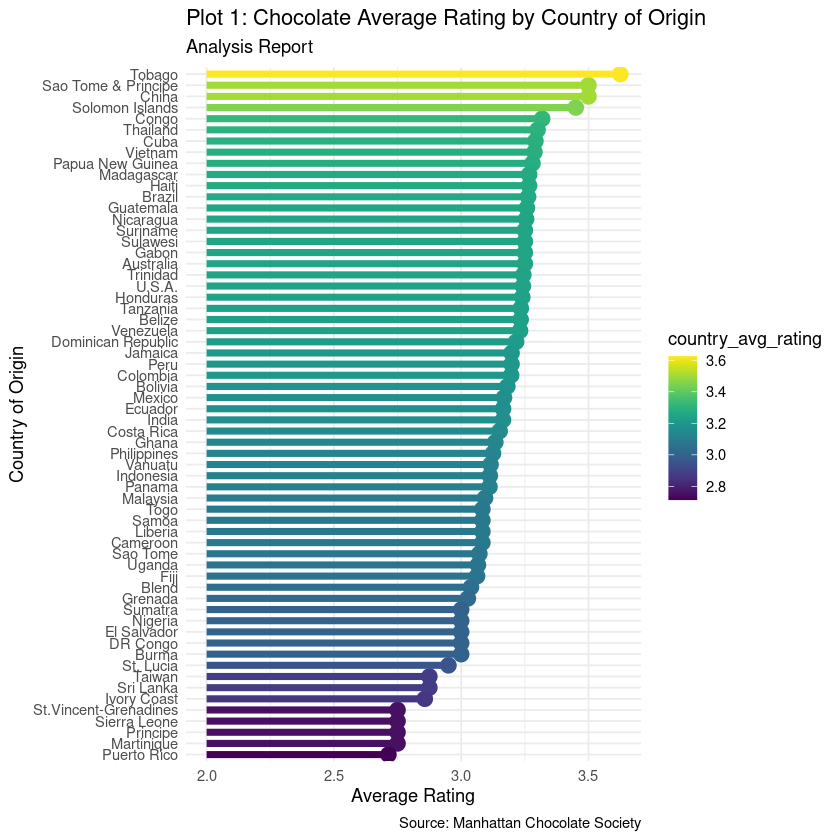

In [53]:

ggplot(country_avg_ratings, aes(x= country_avg_rating, y=fct_reorder(bean_origin, country_avg_rating), color= country_avg_rating))+
       geom_point(size = 4) +
geom_segment(aes(xend = 2, yend = bean_origin), size = 2) +
scale_color_viridis(option = "D")+
labs(x="Average Rating", y="Country of Origin",
     title="Plot 1: Chocolate Average Rating by Country of Origin",
     subtitle = "Analysis Report",
     size = "Number of bars per origin country",
     caption = "Source: Manhattan Chocolate Society")+
theme_minimal()


 

As shown in Graph 1, the score of the countries of origin of the bean ranges between 2.7 and 3.6. A chocolate bar made with beans from Tobago gets the highest rating, followed by China and Sao Tome & Principe. The Puerto Rican beans made the chocolate bar less tasty.
Let's continue investigating in other plots how the origin influences the rating.

## Bars reviewed for each of those countries

In [54]:
bars_by_country <- ch %>% 
group_by(bean_origin) %>%
summarise(number_of_bars = n()) %>%
arrange(desc(number_of_bars))

bars_by_country

bean_origin,number_of_bars
<chr>,<int>
Venezuela,253
Peru,244
Dominican Republic,226
Ecuador,219
Madagascar,177
Blend,156
Nicaragua,100
Bolivia,80
Colombia,79


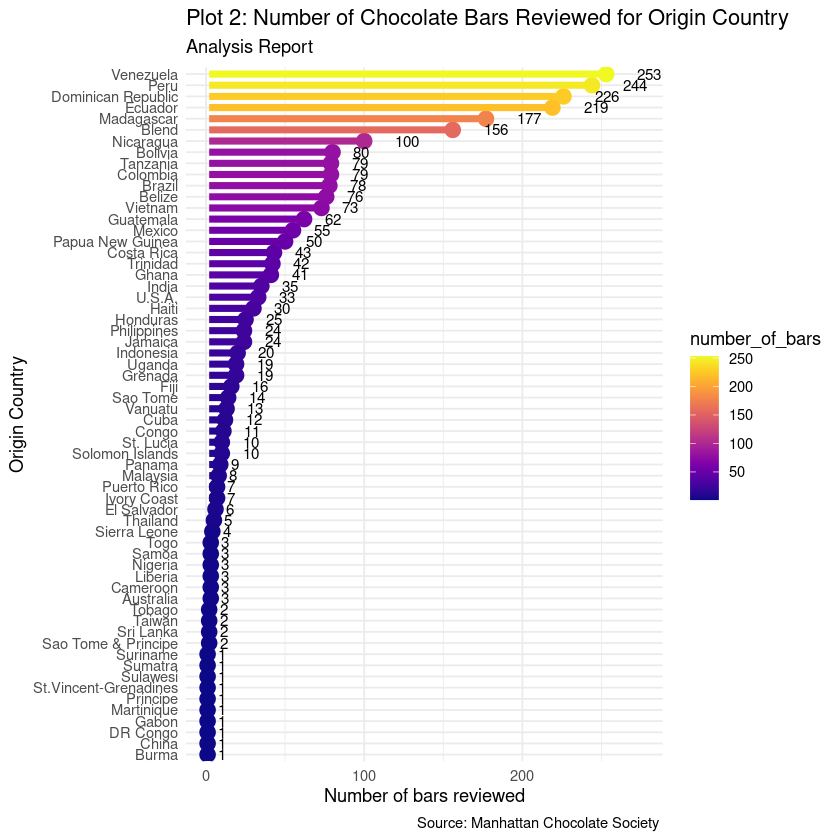

In [55]:
ggplot(bars_by_country, aes(x= number_of_bars, y=fct_reorder(bean_origin, number_of_bars), color= number_of_bars))+
       geom_point(size = 4) +
geom_segment(aes(xend = 2, yend = bean_origin), size = 2) +
scale_color_viridis(option = "C")+
geom_text(aes(label=number_of_bars), hjust=-1.3, size = 3.2, color= "black")+
labs(x="Number of bars reviewed", y="Origin Country",
title="Plot 2: Number of Chocolate Bars Reviewed for Origin Country",
subtitle = "Analysis Report",
size = "Number of bars per country of origin",
caption = "Source: Manhattan Chocolate Society ")+
theme_minimal()+
expand_limits(x = 1:275)

Graph 2 presents the number of chocolate bars reviewed for each country of origin of the bean. The number varies from 1 to 253.

Of the 62 countries of origin for beans, nearly half of them have fewer than 10 bars reviewed.

## Is the cacao bean's origin an indicator of quality?

In [56]:
#Let's check if there is a relation between cacao bean's origin and quality
cacao_bean_ch<- ch %>% group_by(bean_origin) %>%  summarize(origin_rating = mean(rating),n = length(bar_name), avg_percent = mean(cocoa_percent)) %>% arrange(desc(n),desc(origin_rating))
head(cacao_bean_ch, n = 10)

cacao_bean_ch2<- ch %>% group_by(bean_origin) %>%  summarize(origin_rating = mean(rating),n = length(bar_name), avg_percent = mean(cocoa_percent)) %>% arrange(desc(n),desc(origin_rating))
cacao_bean_ch2


bean_origin,origin_rating,n,avg_percent
<chr>,<dbl>,<int>,<dbl>
Venezuela,3.231225,253,72.01779
Peru,3.197746,244,70.95082
Dominican Republic,3.215708,226,71.52655
Ecuador,3.164384,219,73.27626
Madagascar,3.266949,177,71.23729
Blend,3.038462,156,71.92628
Nicaragua,3.255000,100,71.42000
Bolivia,3.181250,80,71.58750
Tanzania,3.234177,79,72.26582


bean_origin,origin_rating,n,avg_percent
<chr>,<dbl>,<int>,<dbl>
Venezuela,3.231225,253,72.01779
Peru,3.197746,244,70.95082
Dominican Republic,3.215708,226,71.52655
Ecuador,3.164384,219,73.27626
Madagascar,3.266949,177,71.23729
Blend,3.038462,156,71.92628
Nicaragua,3.255000,100,71.42000
Bolivia,3.181250,80,71.58750
Tanzania,3.234177,79,72.26582


When the number of chocolate bars reviewed is less than 10 bars, the distribution in the rating is random and does not result in a good rating index.

England and Switzerland have the most variability in their qualification scores. Although Denmark does not have a high rating compared to other countries, it has never had a bad rating. Although the US has the most chocolate reviews over the years, it has an average rating compared to other countries. Switzerland has chocolates with really promising scores, but due to the high variability of the scores, it seems that it also suffered bad reviews, this may be due to higher expectations for the origin of the chocolate bar from Switzerland. Poland and São Tomé have the most extreme grade point average, but since they have a very low number of observations, the result is not strong.



## How does cocoa content relate to rating? 

In [57]:
# group by cocoa content the average rating
cocoa_rating<- ch %>% group_by(cocoa_percent) %>%  summarize(cocoa_rat = mean(rating),n = length(bar_name), avg_percent = mean(cocoa_percent)) %>% arrange(desc(n),desc(cocoa_rat))
head(cocoa_rating, n = 10)

cocoa_percent,cocoa_rat,n,avg_percent
<dbl>,<dbl>,<int>,<dbl>
70,3.263384,1046,70
75,3.165323,310,75
72,3.210169,295,72
65,3.175000,90,65
80,3.084270,89,80
68,3.288194,72,68
74,3.223881,67,74
73,3.193182,66,73
60,3.005435,46,60


In [58]:
#Checking Cocoa Rating Plus 3.5 Average and Total Average.
cocoa_rating_plus3.5 <- ch %>% filter(rating>3.5) %>% summarize(cocoa_plus= mean(cocoa_percent))
cocoa_rating_plus3.5

cocoa_total <- ch %>% summarize(cocoa_total= mean(cocoa_percent))
cocoa_total

cocoa_plus
<dbl>
70.94782


cocoa_total
<dbl>
71.63972


For a chocolate bar with a rating above 3.5, the average cocoa per cent (70.95%) is lower than the average cocoa per cent (71.64%) of all chocolate bar.
Chocolate bars with a rating above 3.5 the average cocoa per cent (70.9%) is lower than the average cocoa per cent (71.6%) of all chocolate bar.

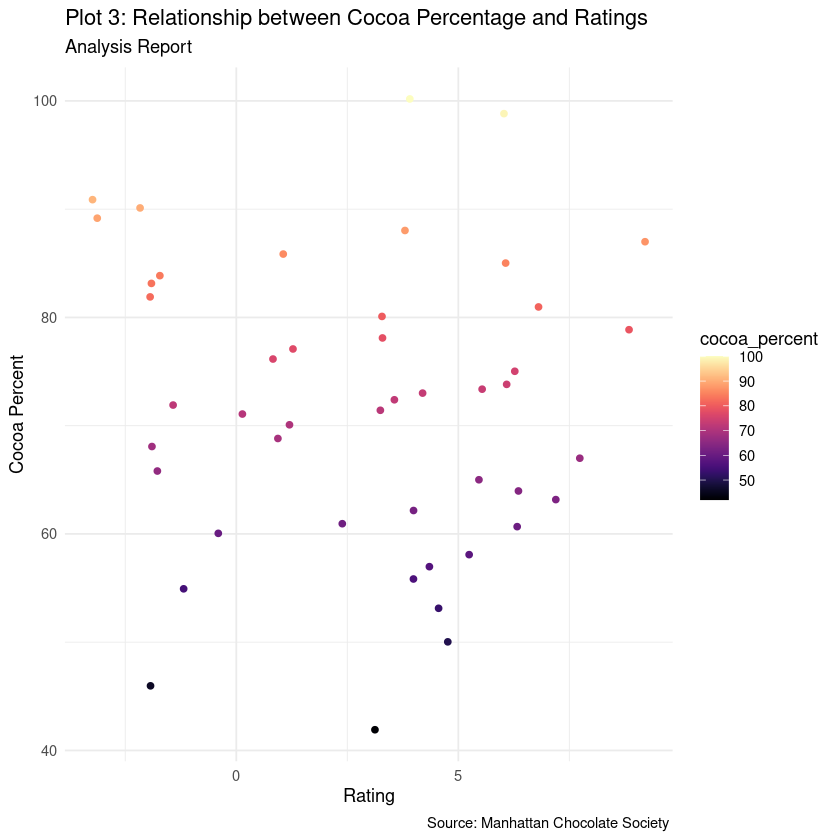

In [59]:
# Plot3 return graph about relation between cocoa content relate to rating
posn_j <- position_jitter(6, seed=1000)


ggplot(cocoa_rating, aes(cocoa_rat, cocoa_percent, color=cocoa_percent))+
geom_point(position = posn_j)+
scale_color_viridis(option = "A")+
labs(x="Rating", y="Cocoa Percent",
title="Plot 3: Relationship between Cocoa Percentage and Ratings",
subtitle = "Analysis Report",
size = "Number of bars per country of origin",
caption = "Source: Manhattan Chocolate Society ")+
theme_minimal() 


## What is the average cocoa content for bars with higher ratings (above 3.5)?

In [60]:
#Checking Cocoa Rating Plus 3.5 Average and Total Average.
cocoa_highest_rating<- ch %>% filter(rating > 3.5 ) %>%  summarize(cocoa_mean_content = mean(cocoa_percent))
head(cocoa_highest_rating, n = 10)

cocoa_total <- ch %>% summarize(cocoa_total= mean(cocoa_percent))
cocoa_total


cocoa_mean_content
<dbl>
70.94782


cocoa_total
<dbl>
71.63972


We can infer that the higher the rating, the lower the chocolate percentage appears to be. Chocolates with 70-71% cocoa are expected to have the highest ratings.
Although there is a negative relationship between cocoa content and mean rating, cocoa percent and ratings are not correlated.

## Comparing the average rating of bars with and without lecithin (L in the ingredients).

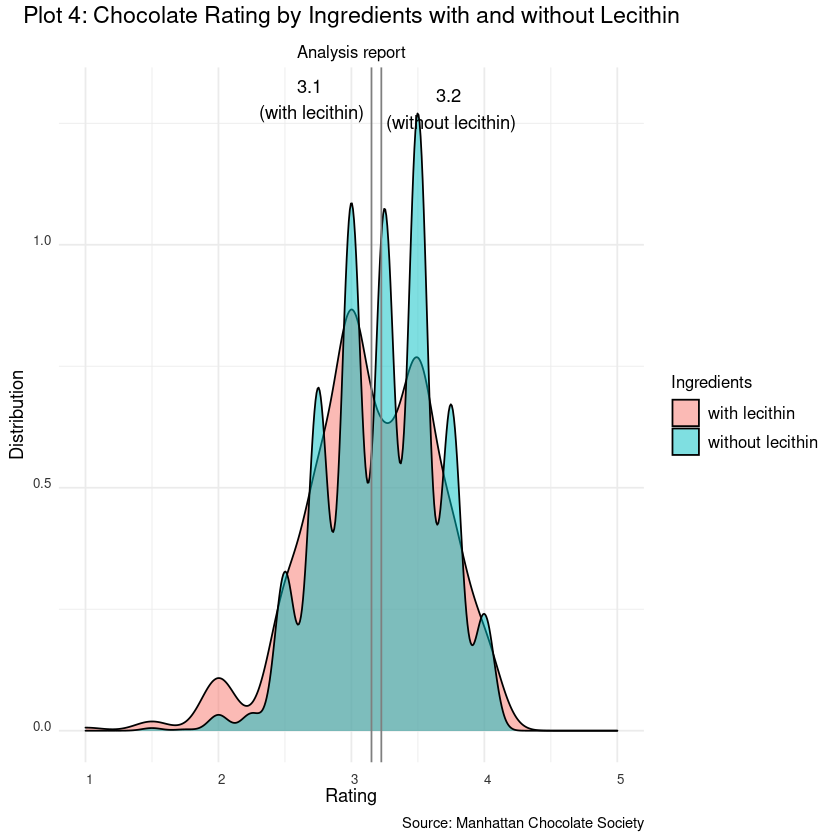

In [61]:
ggplot(data = subset(choc, !is.na(ingredients_L)),
aes(x=rating, fill = ingredients_L))+
geom_density(alpha = 0.5)+
scale_color_viridis(option = "A")+
labs(x="Rating", y="Distribution",
title="Plot 4: Chocolate Rating by Ingredients with and without Lecithin",
subtitle = "Analysis report",
caption = "Source: Manhattan Chocolate Society",
fill = "Ingredients")+ # change the name of the legend
theme_minimal()+
expand_limits(x = 1:5)+
theme(plot.title = element_text(hjust = 0.5, vjust = 1.5, size = 14),
plot.subtitle = element_text(hjust = 0.5, vjust = 0, size = 10),
legend.position="right",
legend.title= element_text(size=10),
legend.text = element_text(size=10),
axis.text.x = element_text(color = "grey20", size = 8, angle = 0, hjust= 0, vjust = 0, face = "plain"),
axis.text.y = element_text(color = "grey20", size = 8, angle = 0, hjust= 0, vjust = 0, face = "plain"))+
geom_vline(xintercept=3.151, color="grey 50", size=0.5)+
annotate("text", x = 2.7, y = 1.3, label = "3.1 \n(with lecithin)", parse =F)+
geom_vline(xintercept=3.225, color="grey 50", size=0.5)+
annotate("text", x = 3.75, y = 1.28, label = "3.2 \n(without lecithin)",parse = F)


The graph shows the difference in rating between chocolate bars with and without lecithin. For chocolate bars without lecithin as ingredients, the average rating is 3.2. For chocolate bars with lecithin as one of the ingredients, the average rating is 3.1. 
There's slight difference (1%) between rating and the lecithin usage in chocolates. It shows that including lecticin decreases the perceived quality of chocolate. 


## Summary

* The average rating of review by origin range from 2.7 to 3.6 and there are more chocolate bars with rating   higher than 3.
* Most of the cholocolate bars have 3 ingredients
* The number of review by origin range from 1 to 253
* Average rating of the chocolate bar is highest for the country Tobago
* Average rating of the chocolate bar is lowest for the country Puerto Rico
* Cocoa bean's origin is not an indicator of quality, There does not seem to be any significant difference between the location of the company and its chocolate ratings, with all companies sharing almost the same discrepancy and rating ranges.
* Including Lecticin among the ingredients decreases the perceived quality of the chocolate, and should not be included. Although this is a small difference in the average rating with or without lecticin, when analyzing it together with the amount of ingredients chosen to make a good gourmet chocolate bar (3), it is advisable to refrain from the use of lecticin